# **Importing the modules**

In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, make_scorer
from sklearn.metrics import matthews_corrcoef
from category_encoders import WOEEncoder, BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split, StratifiedKFold, LeaveOneOut, cross_validate
import pickle
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# **Load dataset**

In [8]:
ML_data = pd.read_csv("ML_UG_dataset.csv", sep = ",")
Val_data = pd.read_csv("ML_SA_dataset.csv", sep = ",")
print(ML_data.shape)
print(ML_data.dtypes)
ML_data.head(2)

(182, 5003)
Unnamed: 0      int64
Sample         object
HIV STATUS      int64
AGE             int64
SEX             int64
                ...  
POS_4408920     int64
POS_4408923     int64
POS_4409954     int64
POS_4410386     int64
POS_4411016     int64
Length: 5003, dtype: object


,Unnamed: 0,Sample,HIV STATUS,AGE,SEX,STM,INH,RIF,EMB,POS_371,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,0,ERR038736,0,30,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,ERR038737,0,23,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# **Converting the columns to the correct data types**

In [9]:
# Select columns with the common prefix 'POS'
pos_columns = ML_data.filter(like='POS')

# Convert selected columns to categorical
ML_data[pos_columns.columns] = pos_columns.astype('category')

ML_data['SEX']= ML_data['SEX'].astype('category')
#ML_data['HIV STATUS']=ML_data['HIV STATUS'].astype(int)
ML_data['HIV STATUS']=ML_data['HIV STATUS'].astype('category')
# Converted the Age column to integer 
ML_data['AGE']= ML_data['AGE'].astype(int)
ML_data['RIF']= ML_data['RIF'].astype('category')
ML_data['INH']= ML_data['INH'].astype('category')
ML_data['STM']= ML_data['STM'].astype('category')
ML_data['EMB']= ML_data['EMB'].astype('category')


In [10]:
# Select columns with the common prefix 'POS'
pos_columns = Val_data.filter(like='POS')

# Convert selected columns to categorical
Val_data[pos_columns.columns] = pos_columns.astype('category')

Val_data['SEX']= Val_data['SEX'].astype('category')
#ML_data['HIV STATUS']=ML_data['HIV STATUS'].astype(int)
Val_data['HIV STATUS']=Val_data['HIV STATUS'].astype('category')
# Converted the Age column to integer 
Val_data['AGE']= Val_data['AGE'].astype(int)
Val_data['RIF']= Val_data['RIF'].astype('category')
Val_data['INH']= Val_data['INH'].astype('category')
Val_data['STM']= Val_data['STM'].astype('category')
Val_data['EMB']= Val_data['EMB'].astype('category')

# **Missing value check**

In [11]:
ML_data.isna().sum()

Unnamed: 0     0
Sample         0
HIV STATUS     0
AGE            0
SEX            0
              ..
POS_4408920    0
POS_4408923    0
POS_4409954    0
POS_4410386    0
POS_4411016    0
Length: 5003, dtype: int64

In [12]:
Val_data.isna().sum()

Unnamed: 0     0
Sample         0
AGE            0
SEX            0
HIV STATUS     2
              ..
POS_4408920    0
POS_4408923    0
POS_4409954    0
POS_4410386    0
POS_4411016    0
Length: 5003, dtype: int64

# **Seperating the Features and target**

In [13]:
# Remove columns starting with 'POS'
#ML_data = ML_data.loc[:, ~ML_data.columns.str.startswith('POS')]


In [14]:
Columns_to_be_deleted= ['Sample', 'Unnamed: 0', 'INH', 'EMB', 'RIF']

STM_data = ML_data.drop( Columns_to_be_deleted, axis=1)
Val_data = Val_data.drop( Columns_to_be_deleted, axis=1)

X= STM_data.drop('STM', axis=True)
Y= STM_data['STM']

X.shape, Y.shape



((182, 4997), (182,))

In [15]:
Y.value_counts()

0    109
1     73
Name: STM, dtype: int64

In [17]:
missing_rows = Val_data[Val_data['HIV STATUS'].isna()]
missing_rows.head()
# Assuming X is a pandas DataFrame
Val_data = Val_data.dropna(subset=['HIV STATUS'])

In [18]:
X_val= Val_data.drop('STM', axis=True)
Y_val= Val_data['STM']

X_val.shape, Y_val.shape


((236, 4997), (236,))

In [19]:
Y_val.value_counts()

1    141
0     95
Name: STM, dtype: int64

# **Splitting the dataset**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify=Y, test_size=0.2, random_state=42
)

In [13]:
X_train.shape, X_test.shape

((145, 4997), (37, 4997))

In [14]:
y_train.value_counts()

0    87
1    58
Name: STM, dtype: int64

In [15]:
y_test.value_counts()

0    22
1    15
Name: STM, dtype: int64

 # **Listing the classification models**

In [16]:
model_rf = RandomForestClassifier(random_state=0)
model_logr =LogisticRegression(random_state=0)
#model_lgbm = LGBMClassifier(random_state=0, n_jobs = -1)
model_xgb = XGBClassifier(random_state=0)
model_gbc = GradientBoostingClassifier(random_state=0)
model_cat = CatBoostClassifier(verbose=False)
model_dt = DecisionTreeClassifier(random_state=0)
model_et = ExtraTreesClassifier(random_state=0)
model_svm = SVC(probability =True)
model_ada = AdaBoostClassifier(random_state=0)
#model_knn = KNeighborsClassifier()
#model_gNB =  GaussianNB()
model_nn= MLPClassifier(random_state=1)


models = []
models.append(('LR', model_logr))
models.append(('SVM', model_svm))
models.append(('DT', model_dt))
models.append(('RF', model_rf))
models.append(('AdaBoost', model_ada))
models.append(('GBC', model_gbc))
models.append(('ETC', model_et))
models.append(('CatBoost', model_cat))
models.append(('XGBoost', model_xgb))
models.append(('MLP', model_nn))


# **Preparing pipeline steps**

In [17]:
categorical_columns = ['SEX', 'HIV STATUS']
cat_var = categorical_columns.copy()
con_var = ['AGE']

In [18]:
categorical_prefix = 'POS'
categorical_columns = [col for col in X.columns if col.startswith(categorical_prefix)]
# Add other categorical columns with different prefixes
#categorical_columns += ['SEX', 'HIV STATUS']

cat_var = categorical_columns.copy()

# Numerical variable
#con_var = ['AGE']


In [19]:
from sklearn.feature_selection import SelectFromModel
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
#feature = SelectFromModel(model_rf, threshold=0.001)
ct = ColumnTransformer([('onehot', onehot, cat_var),
                        ('scaler', scaler, con_var)], remainder='passthrough', n_jobs=-1)

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix
from scipy.stats import sem
from sklearn.pipeline import Pipeline

# Function to calculate confidence interval with bootstrapping
def bootstrap_confidence_interval(data, confidence=0.95, n_bootstrap=1000):
    means = []
    
    # Bootstrapping: sample with replacement and compute mean for each sample
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    
    # Calculate confidence interval using percentiles
    lower = np.percentile(means, (1 - confidence) / 2 * 100)
    upper = np.percentile(means, (1 + confidence) / 2 * 100)
    
    return np.mean(means), lower, upper

# Custom scorer for specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)

# Cross-validation function
def cross_validate_metrics(models, X, y, cv=5, confidence=0.95, n_bootstrap=1000):
    skfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = ["accuracy", "precision", "recall", "f1", "roc_auc", "mcc", "specificity"]
    
    score_lists = {score: [] for score in scores}
    results = []
    
    for i, (name, classifier) in enumerate(models):
        print(name)
        
        pipe = Pipeline([('ct', ct), (name, classifier)])  # Assuming `ct` is a predefined ColumnTransformer
        model_results = {score: [] for score in scores}
        model_results['model'] = name
        
        for score in scores:
            if score == "mcc":
                cv_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=make_scorer(matthews_corrcoef))
            elif score == "specificity":
                cv_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=specificity_scorer)
            else:
                cv_scores = cross_val_score(pipe, X, y, cv=skfold, scoring=score)
            
            model_results[score] = cv_scores
            score_lists[score].append(cv_scores)
            print(f"{score} : {np.mean(cv_scores):.4f}")
        
        # Calculate mean, std and bootstrap confidence intervals for each metric
        summary = {'model': name}
        for metric in scores:
            mean, lower_ci, upper_ci = bootstrap_confidence_interval(model_results[metric], confidence, n_bootstrap)
            summary[f'{metric}_mean'] = mean
            summary[f'{metric}_std'] = np.std(model_results[metric])
            summary[f'{metric}_ci_lower'] = lower_ci
            summary[f'{metric}_ci_upper'] = upper_ci
        
        results.append(summary)
        print("\n")
    
    return pd.DataFrame(results)

# Example usage (assuming models, X, and y are defined)
# results_df = cross_validate_metrics(models, X, y)


In [ ]:
# Perform cross-validation and get the results
results_df = cross_validate_metrics(models, X, Y, cv=5, confidence=0.95)
print(results_df)
results_df.head(n=10)

In [ ]:
results_df.head(n=10)

In [ ]:
results_df.to_csv("STM_Cross_val_scores_Combined_dataset.csv")

In [20]:
# Exclude specific columns
columns_to_exclude = ['AGE', 'SEX', 'HIV STATUS']
SNP_data = X.drop(columns=columns_to_exclude)

# Display the new dataset
SNP_data.head()

,POS_371,POS_1228,POS_1552,POS_1849,POS_1977,POS_2532,POS_3446,POS_4013,POS_5078,POS_6112,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
categorical_prefix = 'POS'
categorical_columns = [col for col in SNP_data.columns if col.startswith(categorical_prefix)]
cat_var2 = categorical_columns.copy()

In [23]:
onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
ct = ColumnTransformer([('onehot', onehot, cat_var2)], remainder='passthrough', n_jobs=-1)

In [ ]:
# Perform cross-validation and get the results
results_df = cross_validate_metrics(models, SNP_data, Y, cv=5, confidence=0.95)
print(results_df)

results_df.head(n=10)

LR


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
results_df.to_csv("STM_Cross_val_scores_SNP_dataset.csv")

NameError: name 'results_df' is not defined

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    SNP_data, Y, stratify=Y, test_size=0.2, random_state=42
)

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape, X_train.shape, y_resampled.shape, y_train.shape

((174, 4994), (145, 4994), (174,), (145,))

In [29]:
# Perform cross-validation and get the results
results_df = cross_validate_metrics(models, X_resampled, y_resampled, cv=5, confidence=0.95)
print(results_df)

LR


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remove

accuracy : 0.7531


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remove

precision : 0.7430


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remove

recall : 0.7719


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remove

f1 : 0.7536


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remove

roc_auc : 0.7944


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remove

mcc : 0.5128


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remove

specificity : 0.7333


SVM


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.5753


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.5927


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.4405


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.4879


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.6599


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.1620


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7118


DT


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.6842


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6568


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7837


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7114


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.6840


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.3786


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.5843


RF


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7299


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7258


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7601


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7349


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8054


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.4721


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.6980


AdaBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7072


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.6774


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7935


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7296


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7241


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.4221


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.6190


GBC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7701


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7500


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8170


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7795


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8187


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5475


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7229


ETC


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7126


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7230


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7020


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7075


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7801


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.4304


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7216


CatBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7185


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7041


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.7712


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7318


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.7907


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.4465


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.6641


XGBoost


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

accuracy : 0.7640


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

precision : 0.7479


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

recall : 0.8163


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

f1 : 0.7758


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

roc_auc : 0.8224


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

mcc : 0.5395


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

specificity : 0.7105


MLP


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be r

accuracy : 0.6200


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

precision : 0.4254


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be r

recall : 0.4190


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be r

f1 : 0.4191


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be r

roc_auc : 0.6412


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be r

mcc : 0.2373


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be r

specificity : 0.8131


      model  accuracy_mean  accuracy_std  accuracy_ci_lower  \
0        LR       0.752374      0.105811           0.645714   
1       SVM       0.572248      0.077116           0.508571   
2        DT       0.681973      0.081813           0.611429   
3        RF       0.728765      0.081860           0.649916   
4  AdaBoost       0.707323      0.069762           0.638546   
5       GBC       0.769917      0.031414           0.737109   
6       ETC       0.715150      0.090413           0.626891   
7  CatBoost       0.717667      0.048542           0.672773   
8   XGBoost       0.764585      0.047686           0.722353   
9       MLP       0.620043      0.117664           0.520000   

   accuracy_ci_upper  precision_mean  precision_std  precision_ci_lower  \
0           0.815966        0.743243       0.095642            0.645455   
1           0.640168        0.592976       0.086321            0.520000   
2           0.751261        0.656593       0.063214       

In [30]:
results_df.head(n=10)

,model,accuracy_mean,accuracy_std,accuracy_ci_lower,accuracy_ci_upper,precision_mean,precision_std,precision_ci_lower,precision_ci_upper,recall_mean,...,roc_auc_ci_lower,roc_auc_ci_upper,mcc_mean,mcc_std,mcc_ci_lower,mcc_ci_upper,specificity_mean,specificity_std,specificity_ci_lower,specificity_ci_upper
0,LR,0.752374,0.105811,0.645714,0.815966,0.743243,0.095642,0.645455,0.810000,0.770317,...,0.717598,0.858478,0.517779,0.213285,0.304989,0.639151,0.734463,0.099480,0.637255,0.819608
1,SVM,0.572248,0.077116,0.508571,0.640168,0.592976,0.086321,0.520000,0.665455,0.442790,...,0.612880,0.689158,0.164951,0.157879,0.030969,0.300285,0.714524,0.105519,0.623382,0.792353
2,DT,0.681973,0.081813,0.611429,0.751261,0.656593,0.063214,0.602427,0.707464,0.782311,...,0.613047,0.757843,0.379978,0.166357,0.230962,0.518806,0.583542,0.124276,0.463399,0.677124
3,RF,0.728765,0.081860,0.649916,0.782857,0.724321,0.089658,0.641830,0.805128,0.759316,...,0.717974,0.870127,0.467927,0.166413,0.304107,0.572980,0.697672,0.129101,0.588235,0.815686
4,AdaBoost,0.707323,0.069762,0.638546,0.751597,0.677020,0.053377,0.623156,0.708571,0.793387,...,0.648039,0.786236,0.422704,0.145879,0.278579,0.516389,0.618245,0.085658,0.533333,0.684967
5,GBC,0.769917,0.031414,0.737109,0.794286,0.750439,0.035416,0.717391,0.779842,0.815142,...,0.742907,0.868627,0.546646,0.063668,0.483193,0.589282,0.721905,0.072381,0.649673,0.775163
6,ETC,0.715150,0.090413,0.626891,0.782857,0.725139,0.099245,0.640064,0.807692,0.704247,...,0.697712,0.842810,0.429050,0.181144,0.248721,0.555608,0.722345,0.117108,0.623529,0.819608
7,CatBoost,0.717667,0.048542,0.672773,0.752773,0.703523,0.056926,0.656725,0.753333,0.770142,...,0.703268,0.849865,0.445694,0.102795,0.348172,0.527414,0.662831,0.106023,0.576471,0.758905
8,XGBoost,0.764585,0.047686,0.722353,0.805714,0.750560,0.062405,0.697830,0.800441,0.815061,...,0.773856,0.860131,0.538965,0.084767,0.466405,0.612550,0.706148,0.126595,0.588007,0.797386
9,MLP,0.620043,0.117664,0.520000,0.722857,0.427449,0.357938,0.117647,0.733231,0.423034,...,0.522876,0.764706,0.235284,0.243883,0.028758,0.451285,0.811331,0.188008,0.648366,0.977778


In [31]:
results_df.to_csv("STM_Cross_val_scores_Upsampled_SNP_dataset.csv")

# **Obtaing the features for the top 5 modesl**

In [35]:
##Creating a function 
feature_names = X_resampled.columns
def feature_importance(model, feature_names):
    if model == model_cat:
        model.fit(X_resampled, y_resampled, cat_features=cat_features)
        importance = model.feature_importances_.round(2)
        feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    elif model == model_xgb:
        pipe = Pipeline([('ct', ct),('estimator', model)])
        pipe.fit(X_resampled, y_resampled)
        importance = model.feature_importances_.round(2)
        feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
    else: 
        model.fit(X_resampled, y_resampled)
        importance = model.feature_importances_.round(2)
        feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
        #Features[model] = pd.DataFrame(feature_names, importance)
    return feature_importance[:10]

In [37]:
def plot_feature_importances(importances, model_name, File_name):
    features, scores = zip(*importances)
    
    plt.figure(figsize=(6, 4))
    y_pos = np.arange(len(features))
    
    plt.barh(y_pos, scores, align='center', color="navy")
    plt.yticks(y_pos, features)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    #plt.title(f'Top 10 Features for {model_name}')
    plt.savefig(File_name, dpi=300)
    
    plt.gca().invert_yaxis()  # To show features from top to bottom
    
    plt.show()

In [38]:
model_gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=9,n_estimators = 300, subsample=1.0,  random_state=0)
gbc_features = feature_importance(model_gbc, feature_names)
print(gbc_features)

[('POS_3379763', 0.11), ('POS_2155168', 0.09), ('POS_2973463', 0.07), ('POS_3942481', 0.05), ('POS_104962', 0.04), ('POS_1365837', 0.04), ('POS_672491', 0.03), ('POS_21795', 0.02), ('POS_71336', 0.02), ('POS_976897', 0.02)]


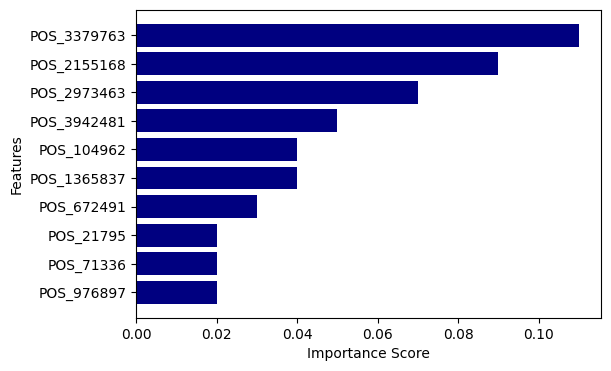

In [39]:
GBC = plot_feature_importances(gbc_features, "Gradient boosting ", 'GBC_STM.png')

# **Hyperparameter tuning**

In [32]:
# Define parameter grids for each classifier
import random
from scipy.stats import randint, uniform

param_dist = {
    'Logistic regression': {
        'C': [0.1, 0.5, 5, 10],
        'max_iter': [100, 300, 500, 1000]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.1, 0.5, 1.0],
        'max_depth': [3,5,7,9],
        'subsample': [0.5, 0.7, 1.0]
    },
    'ExtraTrees Classifier' :{
       'criterion' : ['gini', 'entropy'],
       'max_depth' : [3,7,9] 
    },
    'Suport Vector Machine' :{
       'C': [0.1, 1, 10],
       'kernel': ['linear', 'rbf'],
       'gamma': ['scale', 'auto']
    },
    'Neural networks' :{
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    },
    'Ada Boost' :{
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.1, 0.5, 1.0]   
    },
    'Decision trees' :{
       'criterion' : ['gini', 'entropy'],
       'max_depth' : [3,7,9] 
    },
    'Random Forest' :{
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
}

In [33]:
model_rf = RandomForestClassifier()
model_logr =LogisticRegression(random_state=0)
model_gbc = GradientBoostingClassifier(random_state=0)
model_dt = DecisionTreeClassifier()
model_et = ExtraTreesClassifier()
model_svm = SVC()
model_ada = AdaBoostClassifier(random_state=0)
model_nn= MLPClassifier(random_state=1)


models = []
models.append(('Logistic regression', model_logr))
models.append(('Suport Vector Machine', model_svm))
models.append(('Decision trees', model_dt))
models.append(('Random Forest', model_rf))
models.append(('Ada Boost', model_ada))
models.append(('Gradient Boosting', model_gbc))
models.append(('ExtraTrees Classifier', model_et))
models.append(('Neural networks', model_nn))


In [34]:
%%time

from sklearn.model_selection import GridSearchCV
best_params = {}  # Initialize a dictionary to store the best parameters for each model
best_model = {}
best_score = {}

# Initialize an empty list to store the AUC scores and parameters
auc_scores = []
params = []

for i, (name, classifier) in enumerate(models):
    print(name)
    grid_search = GridSearchCV(classifier, param_dist[name], cv=5, verbose=1, 
                               scoring='roc_auc')

    grid_search.fit(X_train, y_train)

    # Update the best_params dictionary with the best parameters for each model
    best_params[name] = grid_search.best_params_
    best_model[name]= grid_search.best_estimator_
    best_score[name] = grid_search.best_score_

    #print(f"Best Score: {best_score[name]}")


Logistic regression
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Suport Vector Machine
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Decision trees
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Random Forest
Fitting 5 folds for each of 90 candidates, totalling 450 fits


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Ada Boost
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Gradient Boosting
Fitting 5 folds for each of 108 candidates, totalling 540 fits
ExtraTrees Classifier
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Neural networks
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sandra.bab

CPU times: user 15h 4min 56s, sys: 2min 46s, total: 15h 7min 43s
Wall time: 4h 54min 20s


/home/sandra.babirye/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
print(best_params)
print(best_score)
print(best_model)

{'Logistic regression': {'C': 0.5, 'max_iter': 300}, 'Suport Vector Machine': {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}, 'Decision trees': {'criterion': 'gini', 'max_depth': 7}, 'Random Forest': {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}, 'Ada Boost': {'learning_rate': 0.5, 'n_estimators': 300}, 'Gradient Boosting': {'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.5}, 'ExtraTrees Classifier': {'criterion': 'entropy', 'max_depth': 9}, 'Neural networks': {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}}
{'Logistic regression': 0.639572192513369, 'Suport Vector Machine': 0.6627450980392157, 'Decision trees': 0.6265448603683897, 'Random Forest': 0.650445632798574, 'Ada Boost': 0.7336007130124776, 'Gradient Boosting': 0.7177956030897207, 'ExtraTrees Classifier': 0.6351752822341058, 'Neural networks': 0.6068627450980392}
{'Logistic regression': LogisticRegression(C=0.5, max_iter=300, random_st

In [26]:
#model_gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=9, n_estimators=100, random_state=0, subsample=0.5)

model_logr = LogisticRegression(C=5, max_iter=500, random_state=0)

In [27]:
Columns_to_be_deleted = ['AGE', 'SEX', 'HIV STATUS']
X_val = X_val.drop(Columns_to_be_deleted, axis=1)

In [28]:
# Fit the model on the training data
model_logr.fit(X_resampled, y_resampled)
# Make predictions
y_test_pred = model_logr.predict(X_test)
y_val_pred = model_logr.predict(X_val)
y_test_prob = model_logr.predict_proba(X_test)[:, 1]
y_val_prob = model_logr.predict_proba(X_val)[:, 1]

In [29]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import matthews_corrcoef, roc_auc_score, recall_score, precision_score, accuracy_score, f1_score, confusion_matrix

# Calculate metrics with CIs using bootstrapping
def calculate_metrics_with_ci(y_true, y_pred, y_prob, n_bootstraps=1000, alpha=0.95):
    metrics = {}
    
    # Define metric functions
    metric_functions = {
        'MCC': lambda y_true, y_pred: matthews_corrcoef(y_true, y_pred),
        'ROC AUC': lambda y_true, y_prob: roc_auc_score(y_true, y_prob),
        'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
        'Specificity': lambda y_true, y_pred: tn / (tn + fp),
        'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
        'Accuracy': lambda y_true, y_pred: accuracy_score(y_true, y_pred),
        'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred)
    }

    # Compute metrics and CIs
    for name, func in metric_functions.items():
        scores = []
        for _ in range(n_bootstraps):
            y_true_resampled, y_pred_resampled, y_prob_resampled = resample(y_true, y_pred, y_prob)
            tn, fp, fn, tp = confusion_matrix(y_true_resampled, y_pred_resampled).ravel()
            if name == 'Specificity':
                scores.append(func(y_true_resampled, y_pred_resampled))
            else:
                scores.append(func(y_true_resampled, y_prob_resampled if name == 'ROC AUC' else y_pred_resampled))
        lower = np.percentile(scores, (1 - alpha) / 2 * 100)
        upper = np.percentile(scores, (1 + alpha) / 2 * 100)
        mean_score = np.mean(scores)
        metrics[name] = {
            'mean': mean_score,
            'lower_ci': lower,
            'upper_ci': upper
        }

    return metrics

# Test set metrics with CIs
test_metrics = calculate_metrics_with_ci(y_test, y_test_pred, y_test_prob)

# Validation set metrics with CIs
val_metrics = calculate_metrics_with_ci(Y_val, y_val_pred, y_val_prob)

# Create DataFrame to store results
metrics_df = pd.DataFrame({
    'Metric': ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score'],
    'Test Set Mean': [test_metrics[metric]['mean'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Test Set Lower CI': [test_metrics[metric]['lower_ci'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Test Set Upper CI': [test_metrics[metric]['upper_ci'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Validation Set Mean': [val_metrics[metric]['mean'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Validation Set Lower CI': [val_metrics[metric]['lower_ci'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']],
    'Validation Set Upper CI': [val_metrics[metric]['upper_ci'] for metric in ['MCC', 'ROC AUC', 'Recall', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']]
})

# Optional: Round the values for better readability
metrics_df = metrics_df.round({'Test Set Mean': 2, 'Test Set Lower CI': 2, 'Test Set Upper CI': 2,
                               'Validation Set Mean': 2, 'Validation Set Lower CI': 2, 'Validation Set Upper CI': 2})

# Display the resulting dataframe
print(metrics_df)


        Metric  Test Set Mean  Test Set Lower CI  Test Set Upper CI  \
0          MCC           0.18              -0.14               0.48   
1      ROC AUC           0.66               0.48               0.84   
2       Recall           0.41               0.15               0.67   
3  Specificity           0.77               0.58               0.94   
4    Precision           0.54               0.23               0.87   
5     Accuracy           0.62               0.46               0.78   
6     F1 Score           0.45               0.19               0.69   

   Validation Set Mean  Validation Set Lower CI  Validation Set Upper CI  
0                -0.12                    -0.25                     0.01  
1                 0.46                     0.39                     0.53  
2                 0.43                     0.35                     0.51  
3                 0.45                     0.35                     0.55  
4                 0.54                     0.44         

In [30]:
metrics_df.head(n=10)

,Metric,Test Set Mean,Test Set Lower CI,Test Set Upper CI,Validation Set Mean,Validation Set Lower CI,Validation Set Upper CI
0,MCC,0.18,-0.14,0.48,-0.12,-0.25,0.01
1,ROC AUC,0.66,0.48,0.84,0.46,0.39,0.53
2,Recall,0.41,0.15,0.67,0.43,0.35,0.51
3,Specificity,0.77,0.58,0.94,0.45,0.35,0.55
4,Precision,0.54,0.23,0.87,0.54,0.44,0.63
5,Accuracy,0.62,0.46,0.78,0.44,0.37,0.50
6,F1 Score,0.45,0.19,0.69,0.47,0.40,0.55


In [42]:
gbc_features = feature_importance(model_gbc, feature_names)
print(gbc_features)

[('POS_2155168', 0.05), ('POS_888992', 0.04), ('POS_839545', 0.03), ('POS_968426', 0.03), ('POS_2973463', 0.03), ('POS_3930300', 0.03), ('POS_665293', 0.02), ('POS_761155', 0.02), ('POS_836272', 0.02), ('POS_836291', 0.02)]


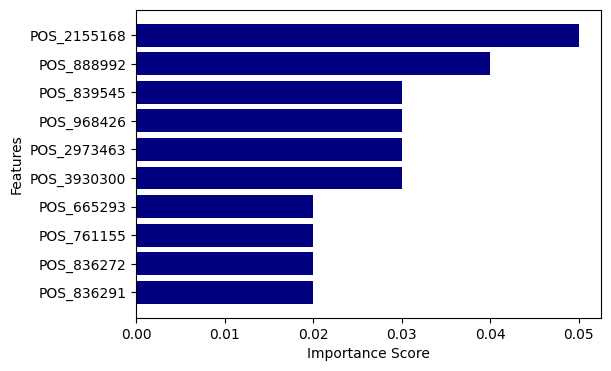

In [43]:
GBC = plot_feature_importances(gbc_features, "Gradient boosting ", 'STM_Best_features.png')

In [90]:
# Create DataFrame
df = pd.DataFrame(gbc_features, columns=['Feature', 'Importance score'])

# Display DataFrame
df.head(n=10)

,Feature,Importance score
0,POS_2155168,0.05
1,POS_888992,0.04
2,POS_839545,0.03
3,POS_968426,0.03
4,POS_2973463,0.03
5,POS_3930300,0.03
6,POS_665293,0.02
7,POS_761155,0.02
8,POS_836272,0.02
9,POS_836291,0.02
